In [1]:
pip install beautifulsoup4 requests nltk textblob matplotlib seaborn


In [2]:
from bs4 import BeautifulSoup


html_content = """
<html>
  <body>
    <div class="review">I love this phone! Battery lasts long.</div>
    <div class="review">Worst camera quality I have ever seen.</div>
    <div class="review">Average performance, but okay for the price.</div>
    <div class="review">Great sound, good value for money.</div>
  </body>
</html>
"""

soup = BeautifulSoup(html_content, 'html.parser')

# Extract reviews from <div class="review">
reviews = [tag.text.strip() for tag in soup.find_all('div', class_='review')]
print(reviews)


['I love this phone! Battery lasts long.', 'Worst camera quality I have ever seen.', 'Average performance, but okay for the price.', 'Great sound, good value for money.']


In [3]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower().strip()
    return text

cleaned_reviews = [clean_text(review) for review in reviews]
print(cleaned_reviews)


['i love this phone battery lasts long', 'worst camera quality i have ever seen', 'average performance but okay for the price', 'great sound good value for money']


In [4]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

sentiments = [get_sentiment(review) for review in cleaned_reviews]
print(list(zip(cleaned_reviews, sentiments)))


[('i love this phone battery lasts long', 0.225), ('worst camera quality i have ever seen', -1.0), ('average performance but okay for the price', 0.175), ('great sound good value for money', 0.6333333333333334)]


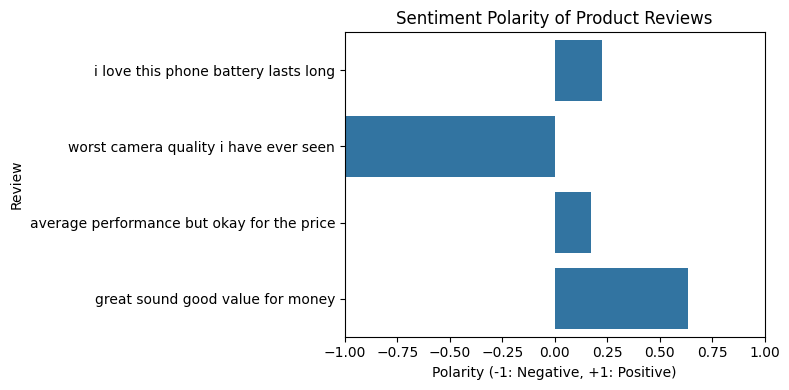

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(x=sentiments, y=cleaned_reviews)
plt.title("Sentiment Polarity of Product Reviews")
plt.xlabel("Polarity (-1: Negative, +1: Positive)")
plt.ylabel("Review")
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()
